# Mel Spectrogram Resize and Normalization Exploration


In [138]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
import numpy as np
import random

Set the seed for reproducibility


In [139]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [140]:
spectrogram_folder = "../../data/melspectrograms_1080silence"

Load all image paths from the mel spectrogram folder


In [141]:
image_paths = [os.path.join(spectrogram_folder, f)
               for f in os.listdir(spectrogram_folder)
               if f.endswith('.png')]

print(f"Found {len(image_paths)} images.")

Found 80 images.


Randomly select 5 mel spectrograms from the folder


In [142]:
random_filepaths = random.sample(image_paths, 5)

print("Randomly selected files:")
for filepath in random_filepaths:
    print(filepath)

Randomly selected files:
../../data/melspectrograms_1080silence/1009_ITS_DIS_XX_melspectrogram.png
../../data/melspectrograms_1080silence/31878_melspectrogram.png
../../data/melspectrograms_1080silence/08931_melspectrogram.png
../../data/melspectrograms_1080silence/41356_melspectrogram.png
../../data/melspectrograms_1080silence/27233_melspectrogram.png


Get the normalization stats of train set


In [143]:
import json

with open("../../data/train_set_stats.json", "r") as f:
    stats = json.load(f)

mean = stats["mean"]
std = stats["std"]

print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: [0.21260474622249603, 0.07653550803661346, 0.18260346353054047]
Std: [0.2794255018234253, 0.1220870390534401, 0.1852213442325592]


Set some transformations


In [144]:
from AveragePoolResize import AveragePoolResize

transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.ToTensor(),
    AveragePoolResize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    # transforms.Normalize(mean=mean, std=std)
])

Define the function to show the transformed image


In [145]:
def show_tensor_image(tensor, title="Transformed Image"):
    tensor = tensor.detach().cpu()
    if tensor.shape[0] == 3:  # [C, H, W]
        img = tensor.permute(1, 2, 0).numpy()  # → [H, W, C]
    else:
        raise ValueError("Expected 3-channel RGB image")

    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


def denormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406])[:, None, None]
    std = torch.tensor([0.229, 0.224, 0.225])[:, None, None]
    return tensor * std + mean

Load random mel spectrogram images


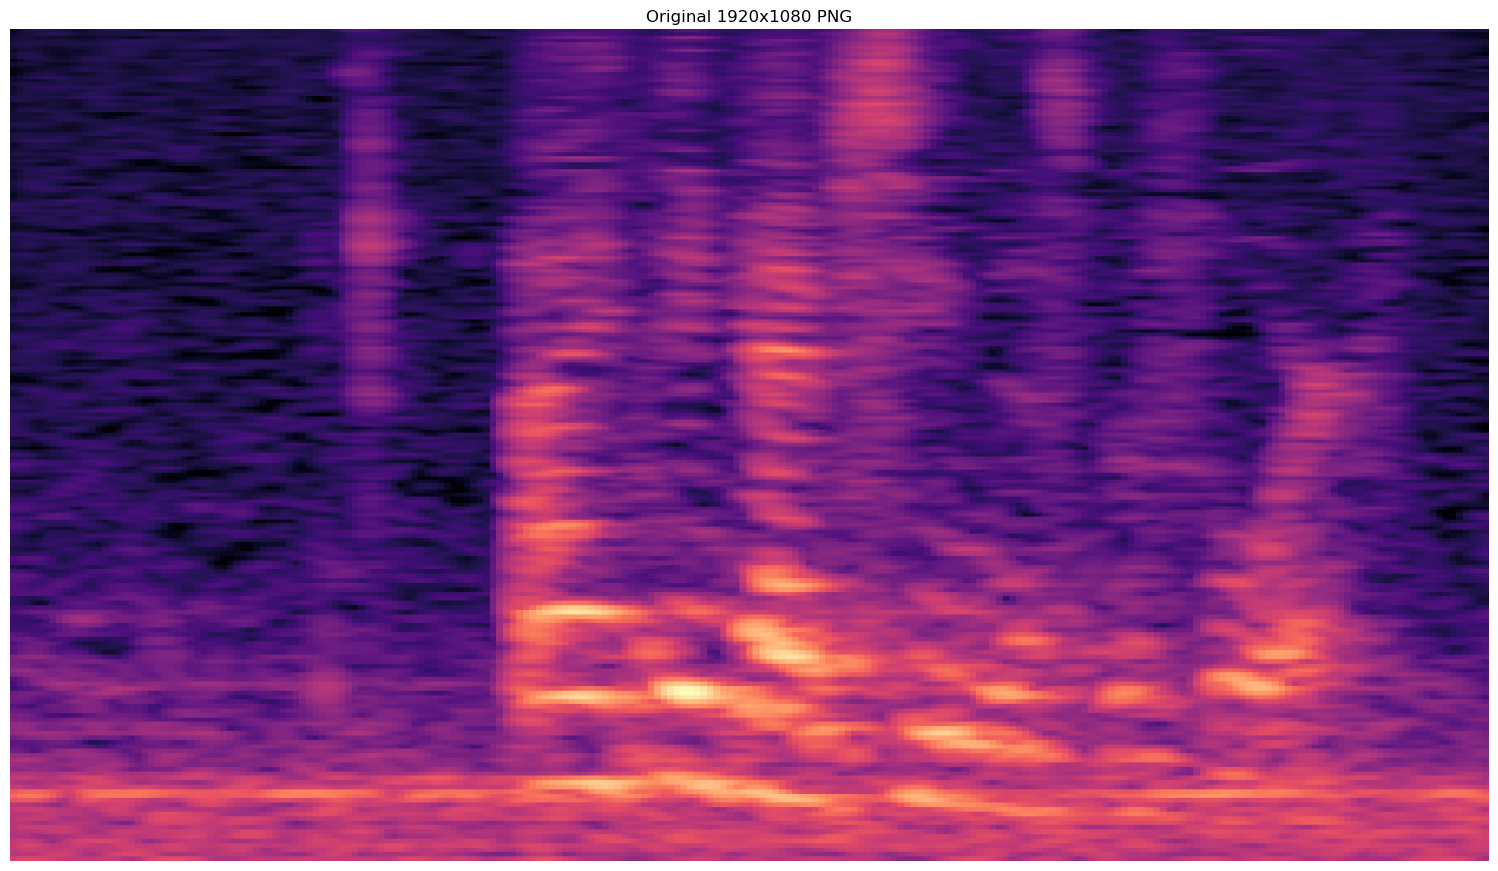

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3935575].


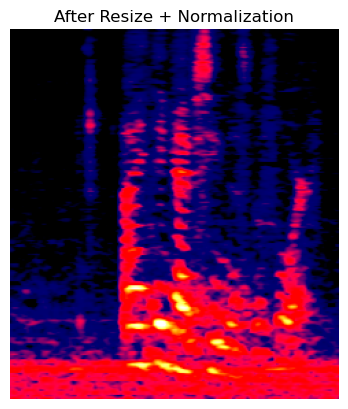

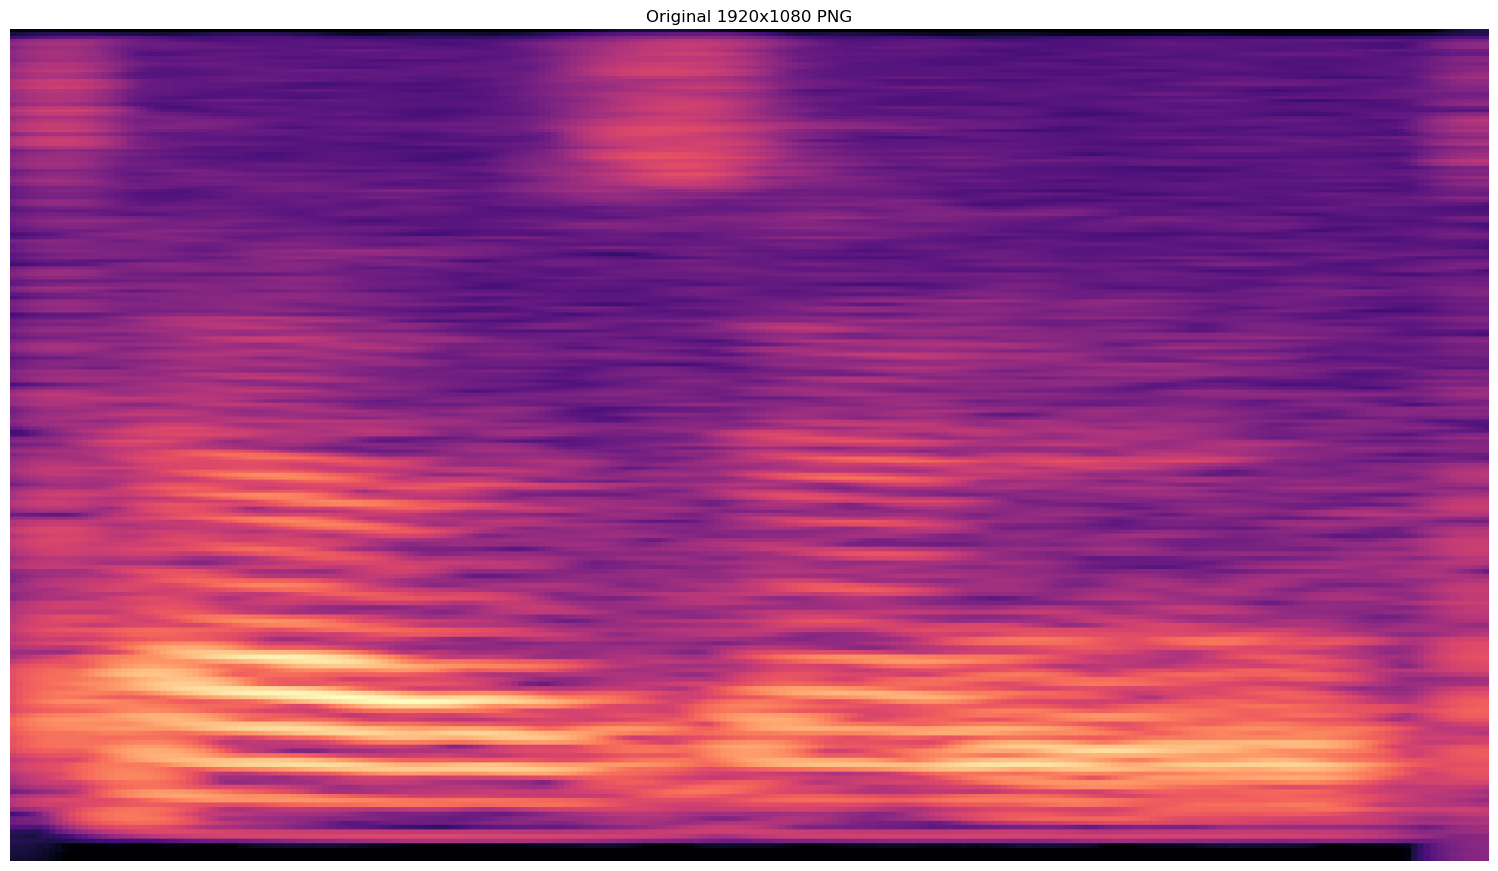

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3935575].


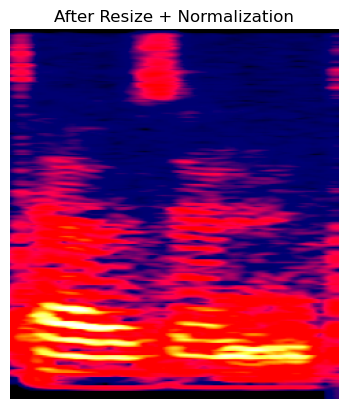

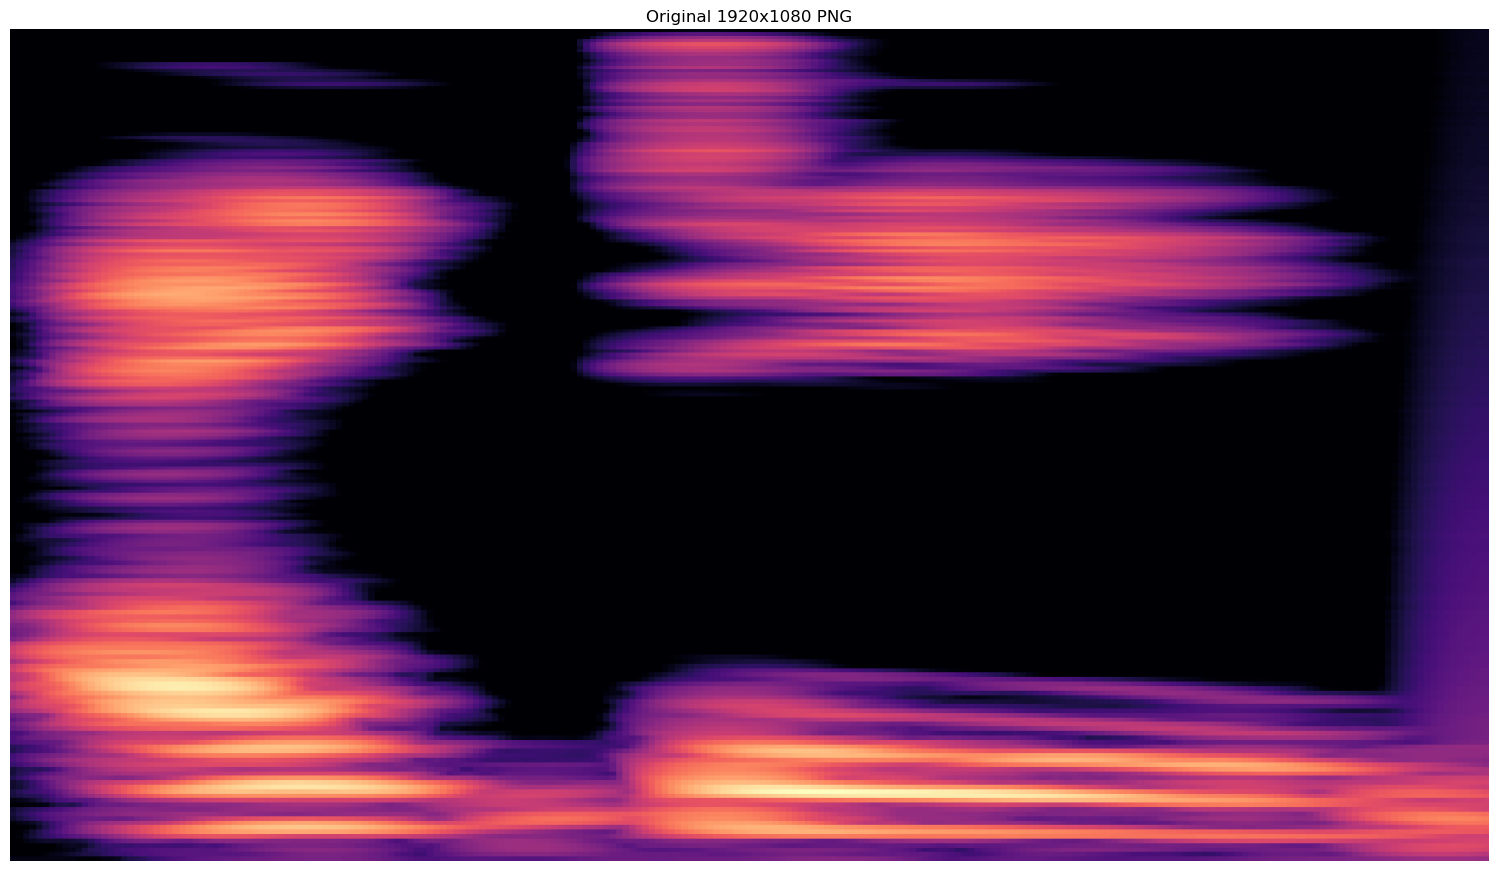

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3935575].


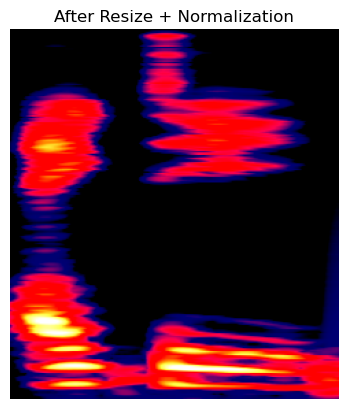

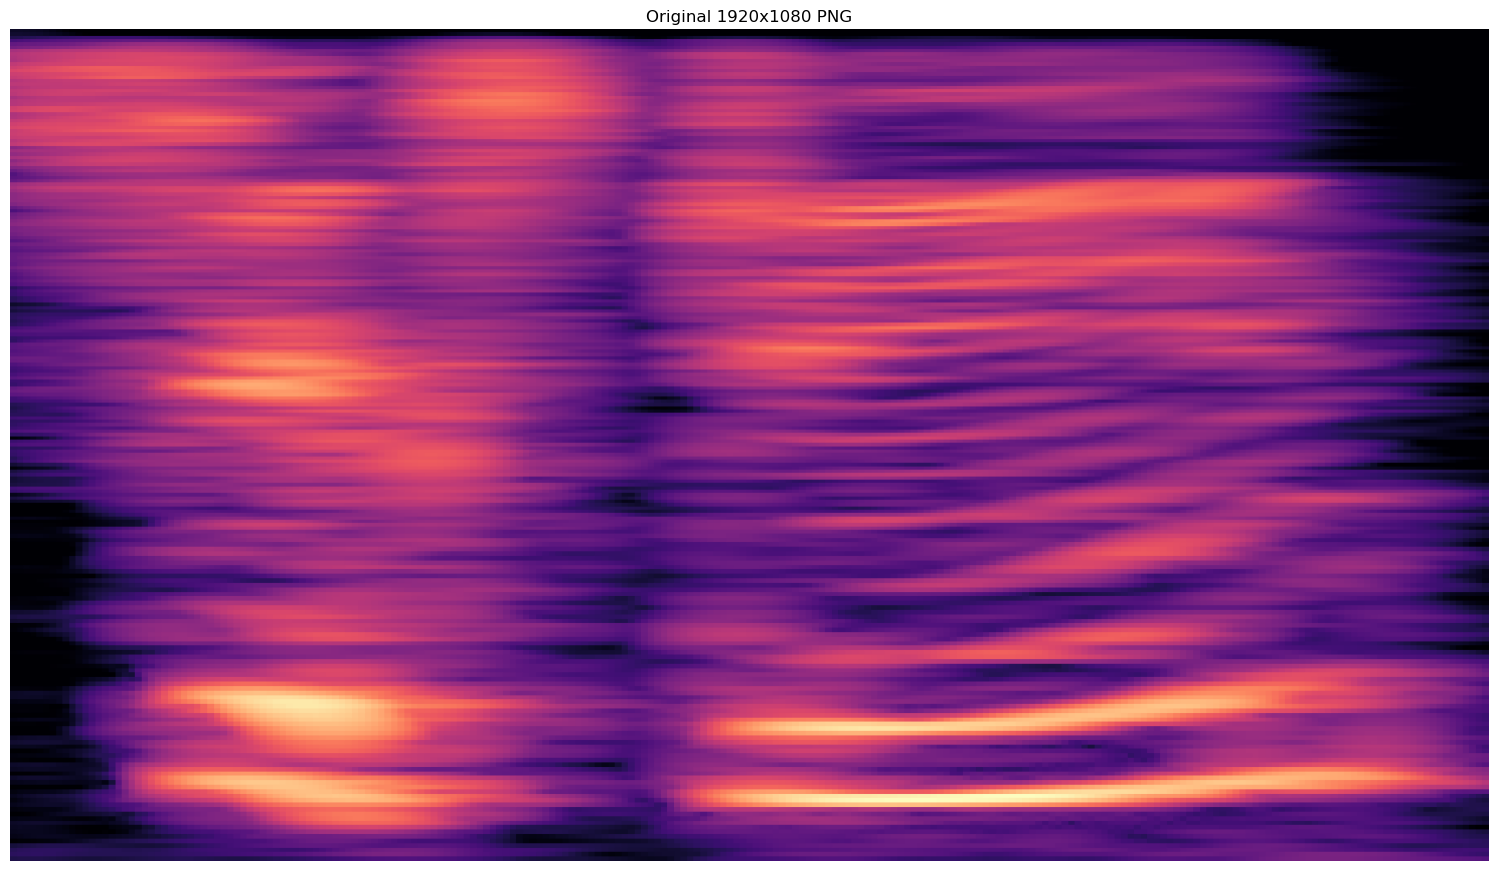

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3935575].


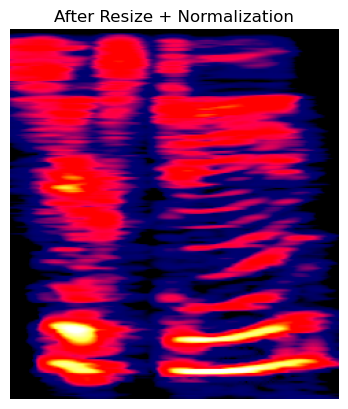

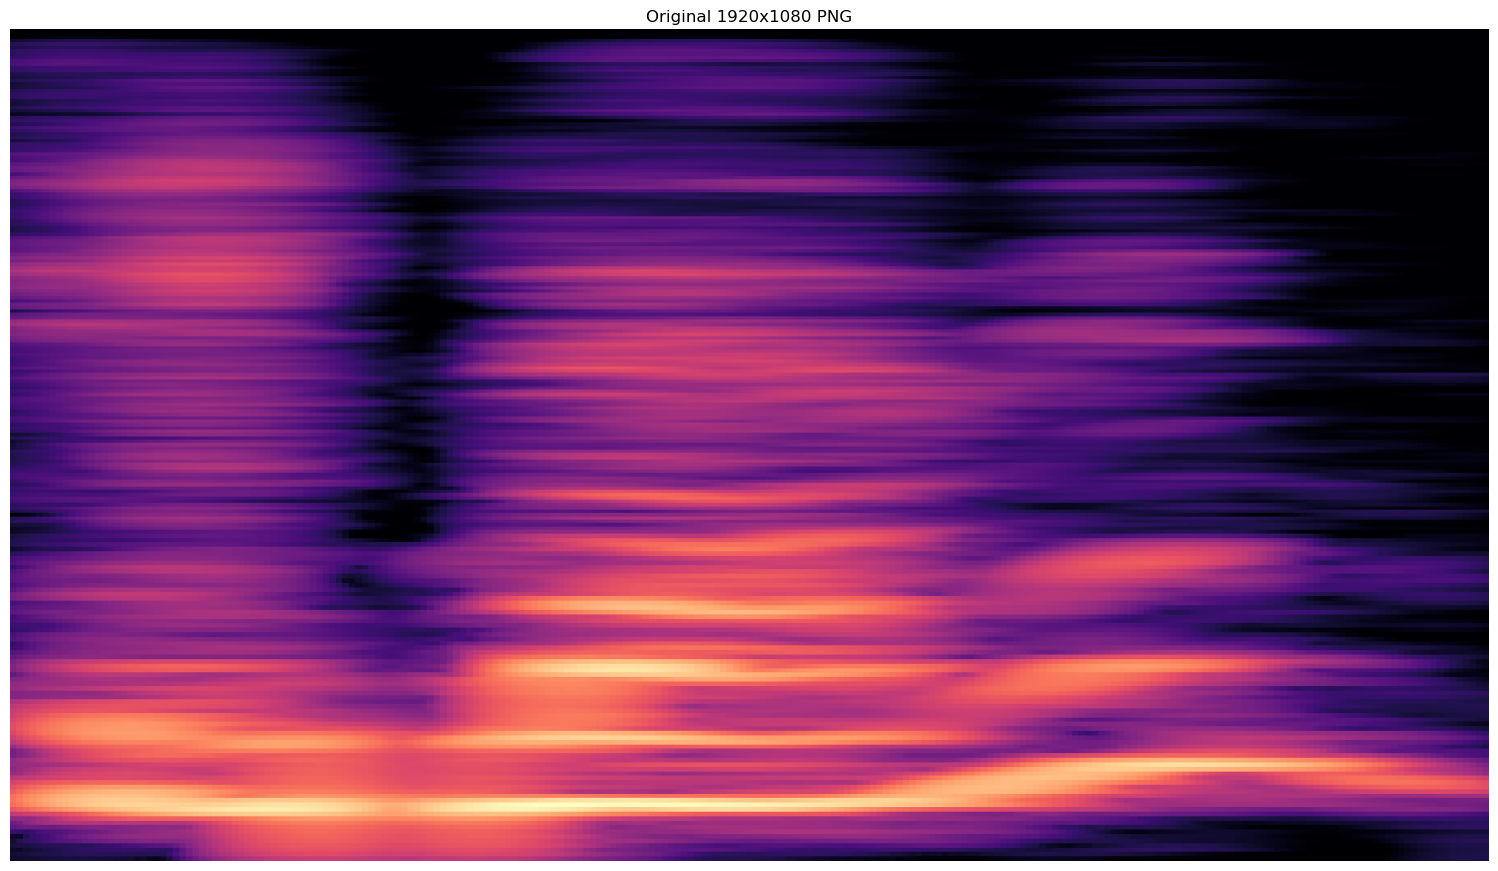

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3935575].


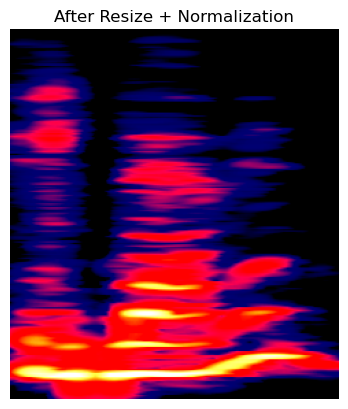

In [146]:
for random_filepath in random_filepaths:
    # Load with PIL
    img = Image.open(random_filepath).convert("RGB")

    plt.figure(figsize=(19.2, 10.8))

    # Original image
    plt.imshow(img)
    plt.title("Original 1920x1080 PNG")
    plt.axis('off')
    plt.show()

    # Apply your transforms
    img_tensor = transform(img)  # shape: [3, 224, 224]

    # Visualize raw transformed image (normalized)
    show_tensor_image(img_tensor, "After Resize + Normalization")